In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy.typing import ArrayLike

sns.set(rc={"figure.dpi":150, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set()

In [2]:
# data
df_swing_states = pd.read_csv("../../../data/2008_swing_states.csv")
df_all_states = pd.read_csv("../../../data/2008_all_states.csv")

In [3]:
# creating a ecdf function
def ecdf(data: ArrayLike):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

## Summary stats

In [4]:
calc_mean = np.mean(df_swing_states[df_swing_states.state == "PA"]["dem_share"])
calc_mean

45.476417910447765

In [5]:
calc_median = np.median(df_swing_states[df_swing_states.state == "PA"]["dem_share"])
calc_median

44.03

## Percentiles, Outliers and box plots

In [6]:
# computing percentiles
np.percentile(df_swing_states["dem_share"], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

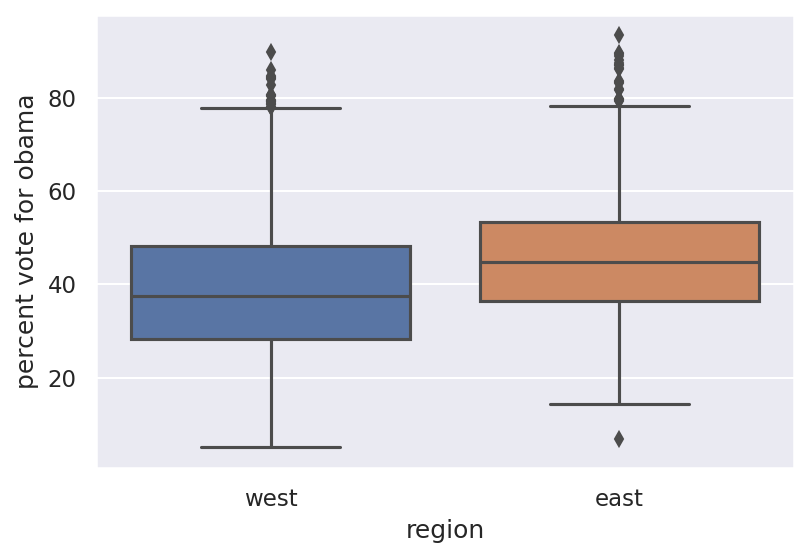

In [19]:
_ = sns.boxplot(x=df_all_states["east_west"], y=df_all_states["dem_share"])
_ = plt.xlabel("region")
_ = plt.ylabel("percent vote for obama")
plt.show()

37.302499999999995


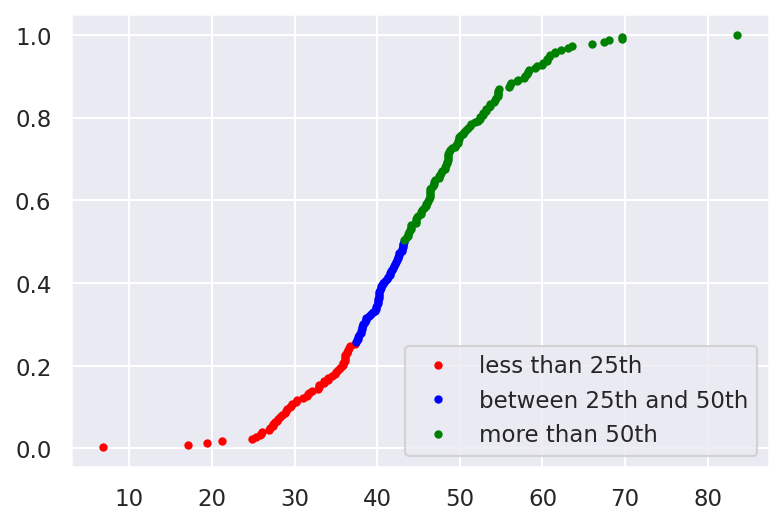

In [20]:
# color by the percentiles of the distribution
# 25, 50, 75
percentiles = np.array([25, 50, 75, 95])
dem_share_percentiles = np.percentile(df_swing_states["dem_share"], percentiles)
print(dem_share_percentiles[0])

x, y = ecdf(df_swing_states["dem_share"])

# x = [i for i in x if i < dem_share_percentiles[0]]

_ = plt.plot(
    [i for i in x if i < dem_share_percentiles[0]],
    [item for i, item in enumerate(y) if x[i] < dem_share_percentiles[0]],
    marker=".",
    color="red", 
    linestyle="none"
)
_ = plt.plot(
    [i for i in x if (i < dem_share_percentiles[1]) and (i > dem_share_percentiles[0])],
    [item for i, item in enumerate(y) if (x[i] < dem_share_percentiles[1]) and (x[i] > dem_share_percentiles[0])],
    marker=".",
    color="blue", 
    linestyle="none"
)
_ = plt.plot(
    [i for i in x if i > dem_share_percentiles[1]],
    [item for i, item in enumerate(y) if x[i] > dem_share_percentiles[1]],
    marker=".",
    color="green", 
    linestyle="none"
)
plt.legend(["less than 25th", "between 25th and 50th", "more than 50th"], loc="lower right")
plt.show()



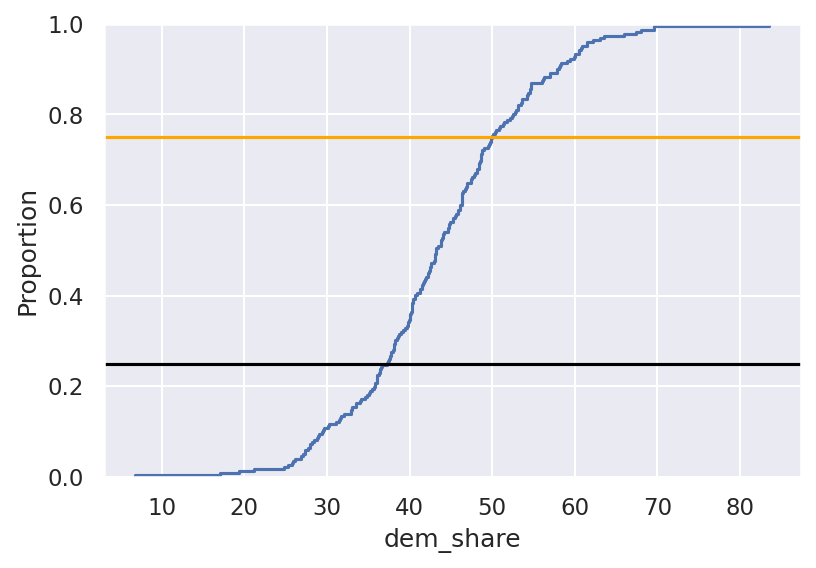

In [17]:
# the same behavior can done with avline with matplotlib and ecdfplot
_ = sns.ecdfplot(x="dem_share", data=df_swing_states)
plt.axhline(y=.25, color="black")
plt.axhline(y=.75, color="orange")
plt.show()

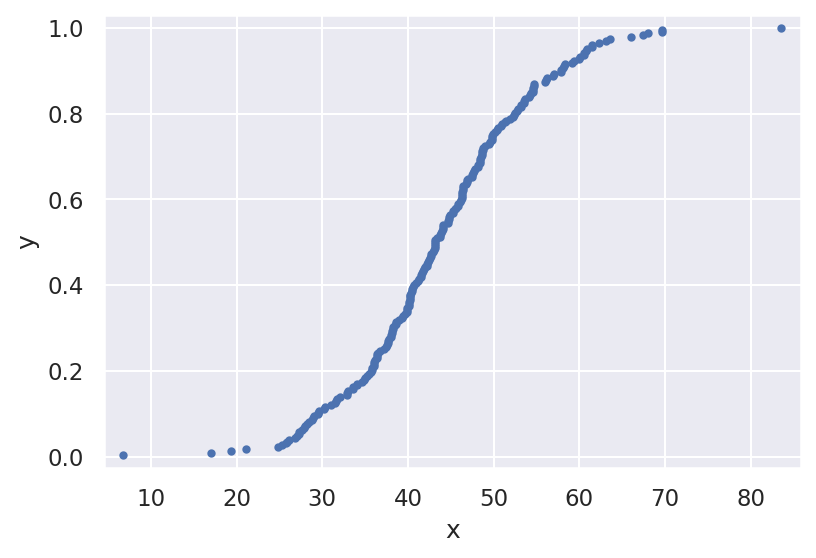

In [21]:
x, y = ecdf(df_swing_states["dem_share"])
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.xlabel("x")
_ = plt.ylabel("y")
plt.margins(0.03)
plt.show()

In [27]:
# compute covariance: np.cov()
# compute correlation coef pearson: np.corrcoef
def pearson_r(x, y):
    """Compute Pearson Correlation coefficient between two arrays"""
    corr_mat = np.corrcoef(x, y)
    
    return corr_mat[0, 1]

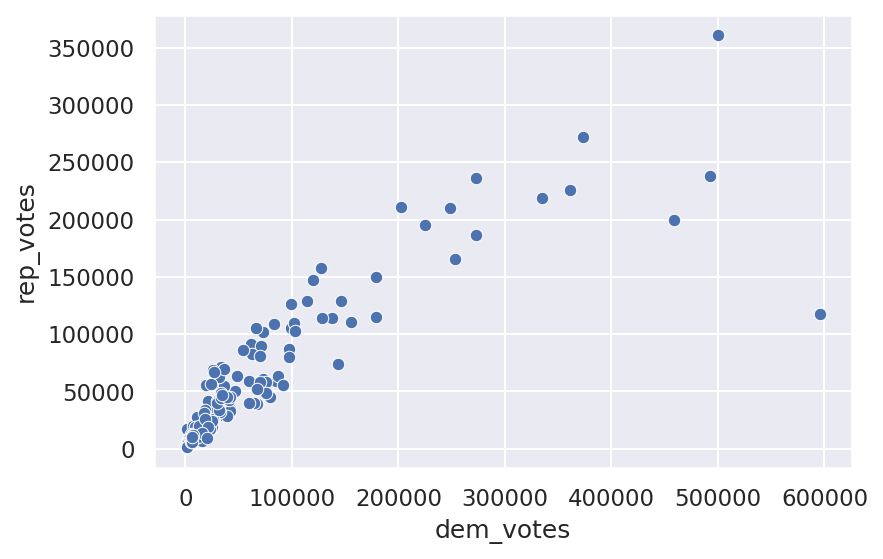

In [28]:
_ = sns.scatterplot(x="dem_votes", y="rep_votes", data=df_swing_states)
plt.show()

In [29]:
# calculating the pearson correlation to this plot
pearson_r(df_swing_states["dem_votes"], df_swing_states["rep_votes"])

0.8889114162385436

## Hacker Statistics

We'll be using simulation of distributions to draw conclusions about our data.

In [36]:
# draw a number between 0 and 1
# Bernoulli trial: an experiment that has two options, "success" (true) and "failure" (false)
np.random.random()

0.7081417561843811

In [37]:
# lets simulating 4 coin flips
random_numbers = np.random.random(size=4)
random_numbers

array([0.93411415, 0.90015356, 0.21216718, 0.05658692])

In [38]:
heads = random_numbers < 0.5
heads

array([False, False,  True,  True])

In [39]:
np.sum(heads)

2

In [40]:
# lets do this a lot of times
n_all_heads = 0
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads/10000

0.0664

So, which is the probability of getting head if we flip the coin 4 times in a row. In this case we know that this follow a bernoulli trial, so we simulate this procedure 10.000 times and count how many times we get head.

In [41]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

In [61]:
perform_bernoulli_trials(100, .05)

6

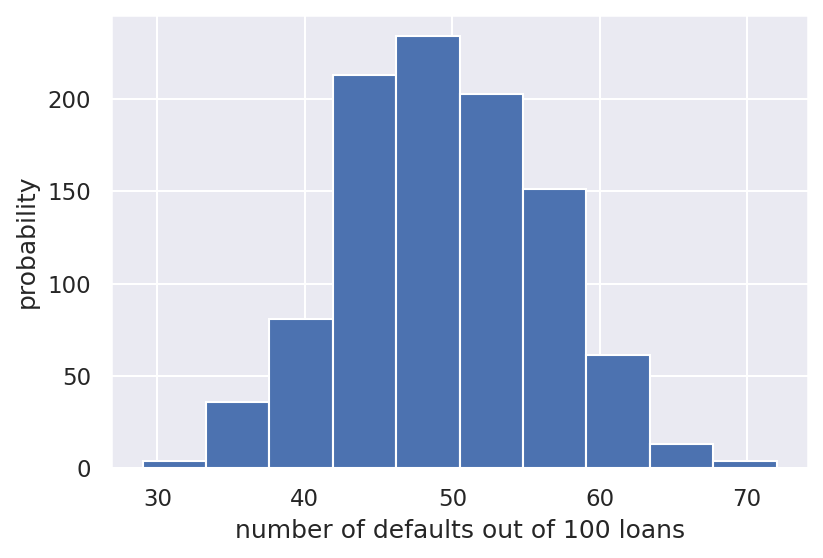

In [49]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
# as much as we do a bernoulli trial, more closer the normal distribution we'll be
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(1000, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

## Probability mass function (PMF)

The set of probabilities of discrete outcomes

A person rolling a die have a Discrete Uniform PMF, each roll have the same probability (1/6)

The outcome of rolling a single die is: 

- Discrete
- Uniformly distributed

The number r of success in n Bernoulli trials with probability p of success, is Binomially distributed. The coin flip experiment is Binomially distributed.

In [62]:
# this way we can use random spcecific for each distribution
np.random.binomial(4, 0.5)  # 4 = for flips, 0.5 = probability of success

2

In [63]:
np.random.binomial(4, 0.5, size=100)

array([0, 3, 3, 2, 2, 3, 3, 0, 3, 2, 1, 2, 3, 1, 0, 2, 3, 2, 0, 3, 1, 2,
       3, 0, 3, 4, 3, 2, 2, 3, 1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 0, 1, 2,
       1, 1, 3, 2, 0, 1, 2, 3, 2, 3, 3, 2, 2, 0, 4, 3, 3, 2, 1, 2, 2, 2,
       1, 1, 3, 2, 1, 3, 4, 1, 1, 1, 2, 3, 3, 2, 2, 3, 1, 3, 1, 0, 3, 2,
       2, 2, 3, 3, 2, 2, 3, 2, 2, 1, 1, 3])

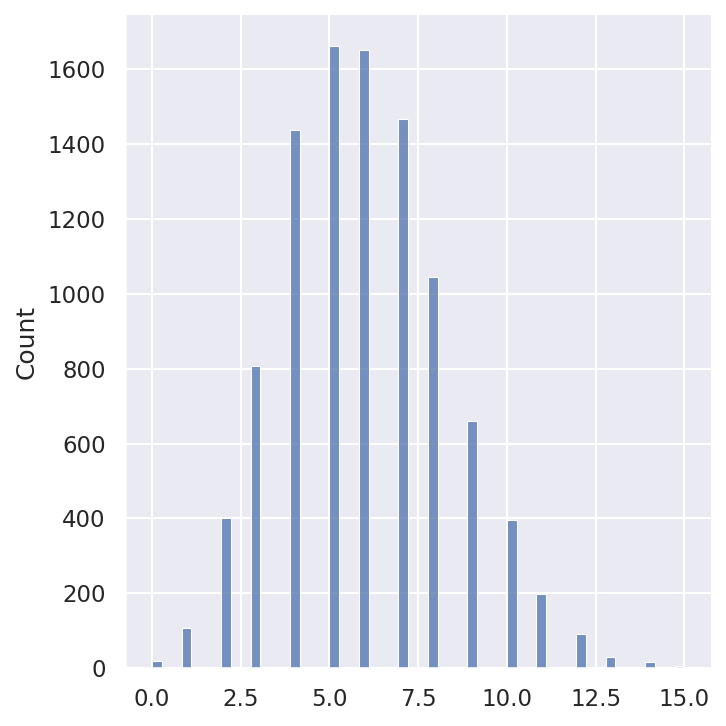

In [68]:
# plotting a binomial PMF
samples = np.random.binomial(60, 0.1, size=10000)
_ = sns.displot(x=samples)

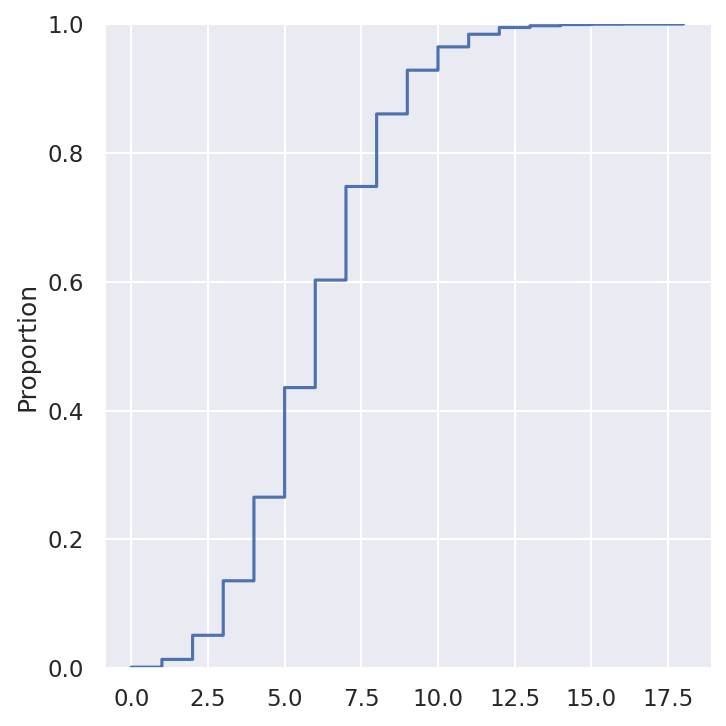

In [69]:
# plotting a binomial CDF
samples = np.random.binomial(60, 0.1, size=10000)
_ = sns.displot(x=samples, kind="ecdf")

Now I see way the ecdf is called of "empirical", that's because we don't know the real distribution before hand. In the plot, we already know that this is a Binomial Distribution, so we call of Binomial CDF.

### Examples

Sampling out of the Binomial distribution
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.

In [72]:
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

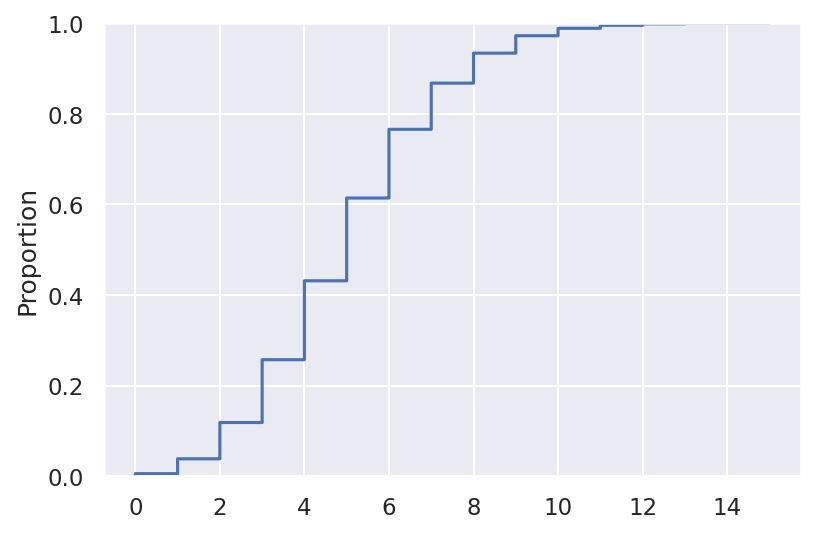

In [74]:
_ = sns.ecdfplot(x=n_defaults)
plt.show()

Plotting the Binomial PMF
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array n_defaults.